<a href="https://colab.research.google.com/github/Saitejamacha/Data_Science_-_AI_ML/blob/main/28thJune_CSGO_Dev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Hey all! ️👋 Dev here. We'll be exploring the magic of dimensionality reduction for supervised learning**

**Link to dataset: https://drive.google.com/file/d/1dJya1kEDoKTT6aJ9Gf24oLQqZxcBLjBh/view?usp=sharing**

### **Curse of Dimensionality**
  * **Dimensionality Reduction**
    * **PCA(principal component analysis)**

      **- Work on maximizing the variance**

      **- Unsupervised Techniques**

    * **LDA(linear discriminant analysis)**

      **- Maximizing the difference between two classes**

      **- Supervised Technique**

## **Step 1 - Importing of Libraries**

#### **1. Configuration Libraries**

In [ ]:
import warnings
warnings.filterwarnings("ignore")

#### **2. Classical Libraries**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

#### **3. Machine Learning Libraries**

In [ ]:
from sklearn.metrics import *
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

## **Step 2 - Data Ingestion**

### **1. Load the data**

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/CSGODataset.csv")

### **2. Data Inspection**

In [ ]:
df.head()

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
3,76.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
4,174.97,1.0,0.0,de_dust2,False,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT


**Insight**
* **The dataset has the information related to `CSGO`**
* **Every record / row, has the detailed information about one single round**
* **AIM: Create a model using less no. of feature and to get similar accuracy as of the model with all the features**

### **3. Data Information**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122410 entries, 0 to 122409
Data columns (total 97 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   time_left                     122410 non-null  float64
 1   ct_score                      122410 non-null  float64
 2   t_score                       122410 non-null  float64
 3   map                           122410 non-null  object 
 4   bomb_planted                  122410 non-null  bool   
 5   ct_health                     122410 non-null  float64
 6   t_health                      122410 non-null  float64
 7   ct_armor                      122410 non-null  float64
 8   t_armor                       122410 non-null  float64
 9   ct_money                      122410 non-null  float64
 10  t_money                       122410 non-null  float64
 11  ct_helmets                    122410 non-null  float64
 12  t_helmets                     122410 non-nul

**Insight**
* **The columns is `96`**
* **The total record is `1, 22, 410`**

## **Step 3 - Data Preprocessing**

#### **Null Check**

In [ ]:
df.isnull().sum().sum()

np.int64(0)

#### **Duplication**

In [ ]:
df.duplicated().sum()

np.int64(4962)

In [ ]:
df = df.drop_duplicates()

In [ ]:
print(f"Rows: {df.shape[0]} and Columns: {df.shape[1]}")

Rows: 117448 and Columns: 97


## **Step 4 - Explorartory Data Analysis**

#### **4.1. Explore the types of maps available in the data, and get the percentage of which map was chosen the most**

In [ ]:
df["map"].value_counts()

,count
map,
de_inferno,22982
de_dust2,21252
de_nuke,18078
de_mirage,17793
de_overpass,13474
de_train,12919
de_vertigo,10805
de_cache,145


In [ ]:
df["map"].value_counts(normalize = True)

,proportion
map,
de_inferno,0.195678
de_dust2,0.180948
de_nuke,0.153923
de_mirage,0.151497
de_overpass,0.114723
de_train,0.109998
de_vertigo,0.091998
de_cache,0.001235


#### **2. Find the percentage of winner of game**

In [ ]:
df["round_winner"].value_counts(normalize = True)

,proportion
round_winner,
T,0.510362
CT,0.489638


### **Feature Encoding**

In [ ]:
# Create a object of encoder
encoder = LabelEncoder()

In [ ]:
# Fit the data that is object in the labelencoder
cat_cols = []

In [ ]:
# Grab all the data that are column
for x in df.columns:
  if (df[x].dtype == "object") | (df[x].dtype == "bool"):
    cat_cols.append(x)

In [ ]:
for x in cat_cols:
  df[x] = encoder.fit_transform(df[x])

## **Step 5 - Data Split**

#### **Split based on features**

In [ ]:
# Independent Column / Features
x = df.drop("round_winner", axis = 1)

# Dependent Column / Target
y = df["round_winner"]

#### **Split the data for testing and training**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

#### **Standardize**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
x_train_scaled = scaler.fit_transform(x_train)

In [ ]:
x_test_scaled = scaler.transform(x_test)

## **6. Linear Discriminant Analysis**

#### **We have to decide how many number of components we have to take in LDA**

**If you have to find out that how many components of LDA are required**
  * **`comp = n_classes - 1`**
  * **`components = min(n_classes - 1, no_of_features)`**

In [ ]:
# min(no_of_clasess - 1, no_of_columns)

1

In [ ]:
df["round_winner"].value_counts()

,count
round_winner,
1,59941
0,57507


#### **Implement the LDA**

In [ ]:
object_LDA = LinearDiscriminantAnalysis(n_components = 1)

#### **Fit the data into the LDA**

In [ ]:
object_LDA.fit(x_train_scaled, y_train)

LinearDiscriminantAnalysis(n_components=1)

In [ ]:
object_LDA.transform(x_test_scaled)

array([[-0.69513285],
       [-0.73135967],
       [ 1.88230848],
       ...,
       [ 1.61680289],
       [-0.12033235],
       [ 1.70538268]])

#### **Calculate the importance / Contribution**

In [ ]:
pd.DataFrame(object_LDA.coef_)

,0,1,2,3,4,5,6,7,8,9,...,86,87,88,89,90,91,92,93,94,95
0,0.143795,-0.015586,0.013174,-0.088613,0.246727,-0.466335,0.32567,-0.591252,0.648593,-0.212916,...,0.037318,-0.174271,0.053516,-0.238963,0.112114,-0.006861,0.008965,-0.098786,-0.00379,0.025554


**These cofficients that are there, they tell you how much importance or contribution they have in building the line of seperation**

In [ ]:
ldaCoeff = np.exp(np.abs(object_LDA.coef_)).flatten()

In [ ]:
ldaCoeff

array([1.15464758, 1.01570857, 1.01326115, 1.09265751, 1.27982982,
       1.59414036, 1.38495812, 1.80624804, 1.91284728, 1.23728114,
       1.18772645, 1.02179198, 1.08578395, 1.02544797, 1.11905524,
       1.43928642, 1.2101309 , 1.82159949, 1.21929099, 1.0367266 ,
       1.36408705, 1.2842165 , 1.        , 1.00096187, 1.01870647,
       1.00687637, 1.00875577, 1.02499066, 1.14379641, 1.0456699 ,
       1.        , 1.02774039, 1.05431311, 1.13889737, 1.01753801,
       1.16173666, 1.        , 1.        , 1.10738292, 1.04741732,
       1.57470785, 1.11058768, 1.00868881, 1.12059308, 1.01718611,
       1.00848594, 1.01702181, 1.0386294 , 1.01167633, 1.01537804,
       1.13516607, 1.03565257, 1.        , 1.00834813, 1.02167188,
       1.02359275, 1.02557095, 1.01273149, 1.        , 1.00709136,
       1.        , 1.01258333, 1.00741194, 1.01328104, 1.22776972,
       1.72371699, 1.09352742, 1.02708451, 1.04763516, 1.0983839 ,
       1.0203126 , 1.00050295, 1.02905605, 1.00260092, 1.01767

#### **Try to visualize the important features**

In [ ]:
no_features = x.shape[1] # Getting the number of columns for the trainig data

In [ ]:
no_features

96

In [ ]:
features_idx = range(no_features)

In [ ]:
features_idx

range(0, 96)

In [ ]:
feature_names = list(x.columns)

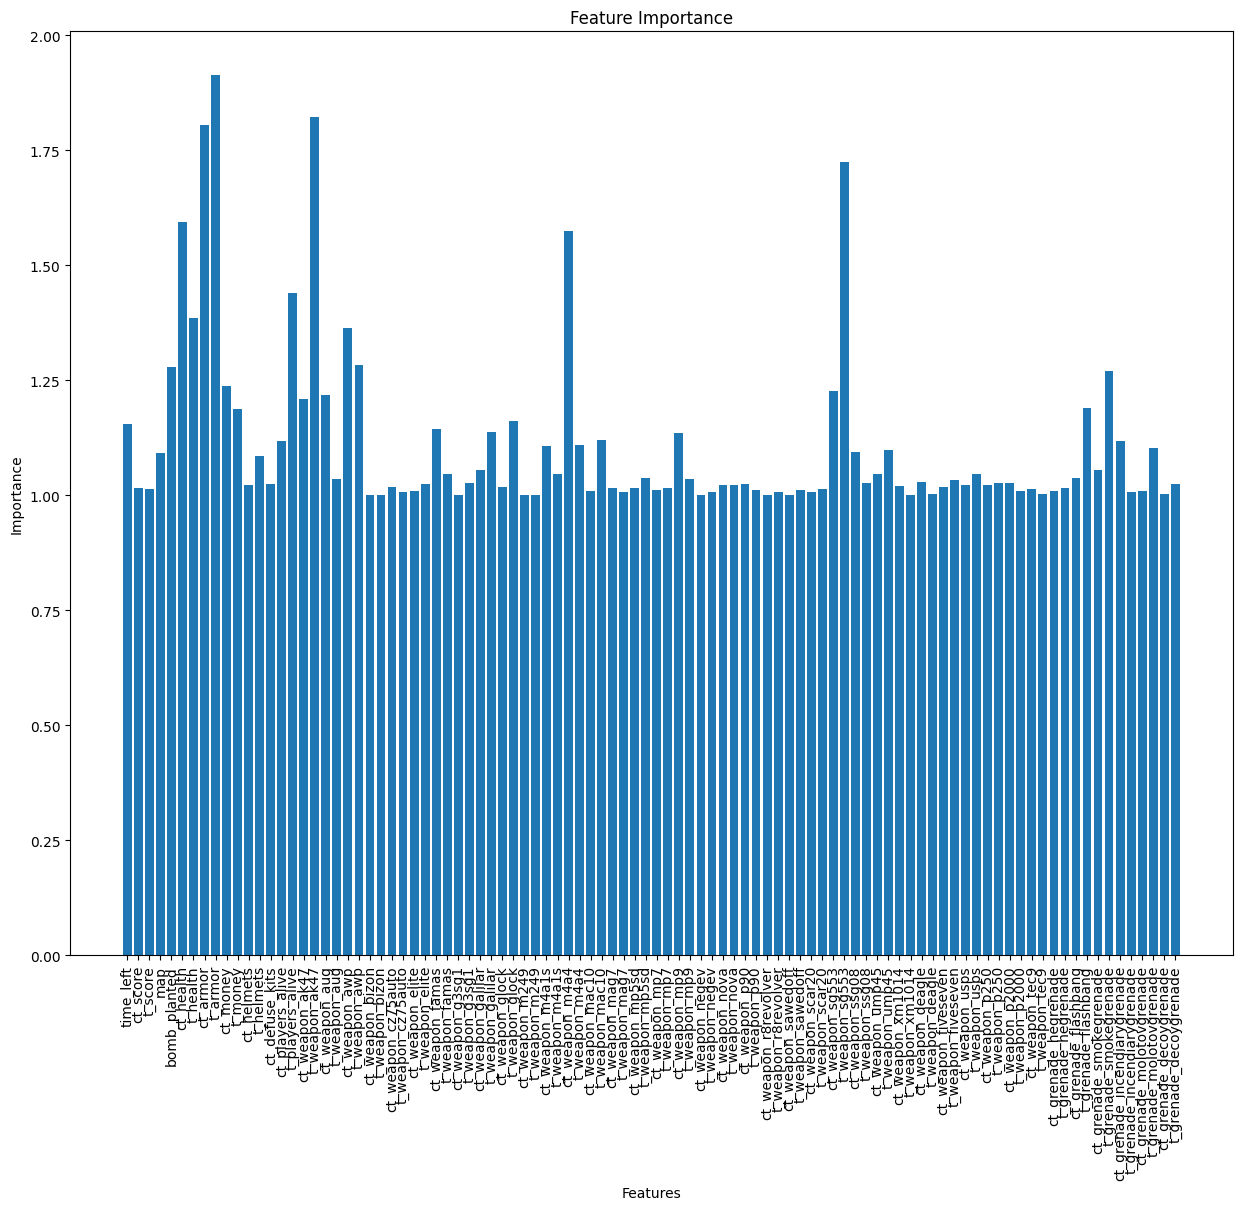

In [ ]:
plt.figure(figsize = (15, 12))
plt.bar(features_idx, ldaCoeff)
plt.xticks(features_idx, feature_names, rotation = "vertical")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importance")
plt.show()

In [ ]:
x.columns

Index(['time_left', 'ct_score', 't_score', 'map', 'bomb_planted', 'ct_health',
       't_health', 'ct_armor', 't_armor', 'ct_money', 't_money', 'ct_helmets',
       't_helmets', 'ct_defuse_kits', 'ct_players_alive', 't_players_alive',
       'ct_weapon_ak47', 't_weapon_ak47', 'ct_weapon_aug', 't_weapon_aug',
       'ct_weapon_awp', 't_weapon_awp', 'ct_weapon_bizon', 't_weapon_bizon',
       'ct_weapon_cz75auto', 't_weapon_cz75auto', 'ct_weapon_elite',
       't_weapon_elite', 'ct_weapon_famas', 't_weapon_famas',
       'ct_weapon_g3sg1', 't_weapon_g3sg1', 'ct_weapon_galilar',
       't_weapon_galilar', 'ct_weapon_glock', 't_weapon_glock',
       'ct_weapon_m249', 't_weapon_m249', 'ct_weapon_m4a1s', 't_weapon_m4a1s',
       'ct_weapon_m4a4', 't_weapon_m4a4', 'ct_weapon_mac10', 't_weapon_mac10',
       'ct_weapon_mag7', 't_weapon_mag7', 'ct_weapon_mp5sd', 't_weapon_mp5sd',
       'ct_weapon_mp7', 't_weapon_mp7', 'ct_weapon_mp9', 't_weapon_mp9',
       'ct_weapon_negev', 't_weapon_negev',

### **Capture all the important features**

In [ ]:
df_feature_score = pd.DataFrame({"Feature Name": feature_names, "Feature Importance": ldaCoeff})

In [ ]:
df_feature_score.head()

,Feature Name,Feature Importance
0,time_left,1.154648
1,ct_score,1.015709
2,t_score,1.013261
3,map,1.092658
4,bomb_planted,1.279830


In [ ]:
# Get the most important feature
df_feature_score.nlargest(20, "Feature Importance")

,Feature Name,Feature Importance
8,t_armor,1.912847
17,t_weapon_ak47,1.821599
7,ct_armor,1.806248
65,t_weapon_sg553,1.723717
5,ct_health,1.594140
40,ct_weapon_m4a4,1.574708
15,t_players_alive,1.439286
6,t_health,1.384958
20,ct_weapon_awp,1.364087
21,t_weapon_awp,1.284217


In [ ]:
df_feature_score.nlargest(20, "Feature Importance").index

Index([8, 17, 7, 65, 5, 40, 15, 6, 20, 21, 4, 89, 9, 64, 18, 16, 87, 10, 35,
       0],
      dtype='int64')

## **Step 7 - Building the model**

In [ ]:
top_20_features = df_feature_score.nlargest(20, "Feature Importance")["Feature Name"].tolist()

In [ ]:
top_20_features

['t_armor',
 't_weapon_ak47',
 'ct_armor',
 't_weapon_sg553',
 'ct_health',
 'ct_weapon_m4a4',
 't_players_alive',
 't_health',
 'ct_weapon_awp',
 't_weapon_awp',
 'bomb_planted',
 't_grenade_smokegrenade',
 'ct_money',
 'ct_weapon_sg553',
 'ct_weapon_aug',
 'ct_weapon_ak47',
 't_grenade_flashbang',
 't_money',
 't_weapon_glock',
 'time_left']

In [ ]:
# New Training data
x_train_new = x_train_scaled[top_20_features]

In [ ]:
x_test_new = x_test[top_20_features]

### **Build the model**

In [ ]:
model = RandomForestClassifier()

In [ ]:
model.fit(x_train_new, y_train)

RandomForestClassifier()

In [ ]:
y_pred = model.predict(x_test_new)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84     17311
           1       0.85      0.83      0.84     17924

    accuracy                           0.84     35235
   macro avg       0.84      0.84      0.84     35235
weighted avg       0.84      0.84      0.84     35235



In [ ]:
print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")

Accuracy Score: 0.8413793103448276


In [ ]:
model_all_features = RandomForestClassifier()
model_all_features.fit(x_train_scaled, y_train)
y_pred_all_features = model_all_features.predict(x_test_scaled)

print("Classification Report with all features:")
print(classification_report(y_test, y_pred_all_features))
print(f"Accuracy Score with all features: {accuracy_score(y_test, y_pred_all_features)}")

Classification Report with all features:
              precision    recall  f1-score   support

           0       0.85      0.88      0.87     17311
           1       0.88      0.85      0.87     17924

    accuracy                           0.87     35235
   macro avg       0.87      0.87      0.87     35235
weighted avg       0.87      0.87      0.87     35235

Accuracy Score with all features: 0.8659855257556407
